In [1]:
import pandas as pd
import seaborn as sns
# import ggplot as gg
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def load_data(path):
    df = pd.read_csv(path)
    g = df.groupby(['network_size', 'network', 'simulation'])
    df['it2'] = g.cumcount()
    df.sort_values(['network_size', 'network', 'simulation', 'it'], inplace=True)
    return df

In [3]:
env_shift = load_data('ext_env_shift_results_vi.csv')
top_shift = load_data('ext_top_shift_results_vi.csv')

In [4]:
env_shift[env_shift.network_size==12][:5]

,it,GG_mean,DG_mean,DG_CL_mean,CL_mean,GG_avar,DG_avar,DG_CL_avar,CL_avar,network,simulation,network_size,it2
24060,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,clique,0,12,0
24061,37,0.00000,0.023810,0.123611,0.000000,0.000000,0.006803,0.029114,0.000000,clique,0,12,1
24062,74,0.00000,0.318528,0.263459,0.015972,0.000000,0.018415,0.036432,0.001546,clique,0,12,2
24063,111,0.03018,0.480573,0.338642,0.009532,0.001716,0.006689,0.023655,0.000496,clique,0,12,3
24064,148,0.08558,0.590513,0.395793,0.044586,0.002711,0.006008,0.017553,0.003504,clique,0,12,4


In [5]:
top_shift[:5]

,it,GG_mean,DG_mean,DG_CL_mean,CL_mean,GG_avar,DG_avar,DG_CL_avar,CL_avar,network,simulation,network_size,it2
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,clique,0,8,0
1,25,0.000000,0.137500,0.229167,0.000000,0.000000,0.042679,0.134425,0.000000,clique,0,8,1
2,50,0.052137,0.381674,0.457440,0.039550,0.003410,0.025907,0.078096,0.002092,clique,0,8,2
3,75,0.062735,0.560308,0.582371,0.052097,0.003826,0.006584,0.053215,0.001442,clique,0,8,3
4,100,0.084739,0.674071,0.641629,0.063439,0.003161,0.005532,0.048284,0.002354,clique,0,8,4


In [6]:
def plot_sizes(data, value, valstat="mean"):
    sizes = sorted(data.network_size.unique())
    n = len(sizes)
    fig, axs = plt.subplots(n, 1, figsize=(12, 6 * n), sharex=True, sharey=True)
    for i, size in enumerate(sizes):
        ax = sns.tsplot(
            data=data[data.network_size == size],
            value=value + "_" + valstat, time='it2', unit='simulation', condition='network',
            ax=axs[i], n_boot=100
        )
        ax.set_ylim(0.0, 1.0)
        ax.set_title('N = %d' % size)

  * GG -- to jest communicative success dla pierwszej topologii/środowiska, na której uczymy najpierw.
  * DG -- to jest discriminative success dla pierwszej topologii/środowiska.
  * CL -- to jest communicative success dla drugiej topologii/środowiska.
  * DG_CL -- to jest discriminative success dla drugiej topologii/środowiska.

## Environment shift

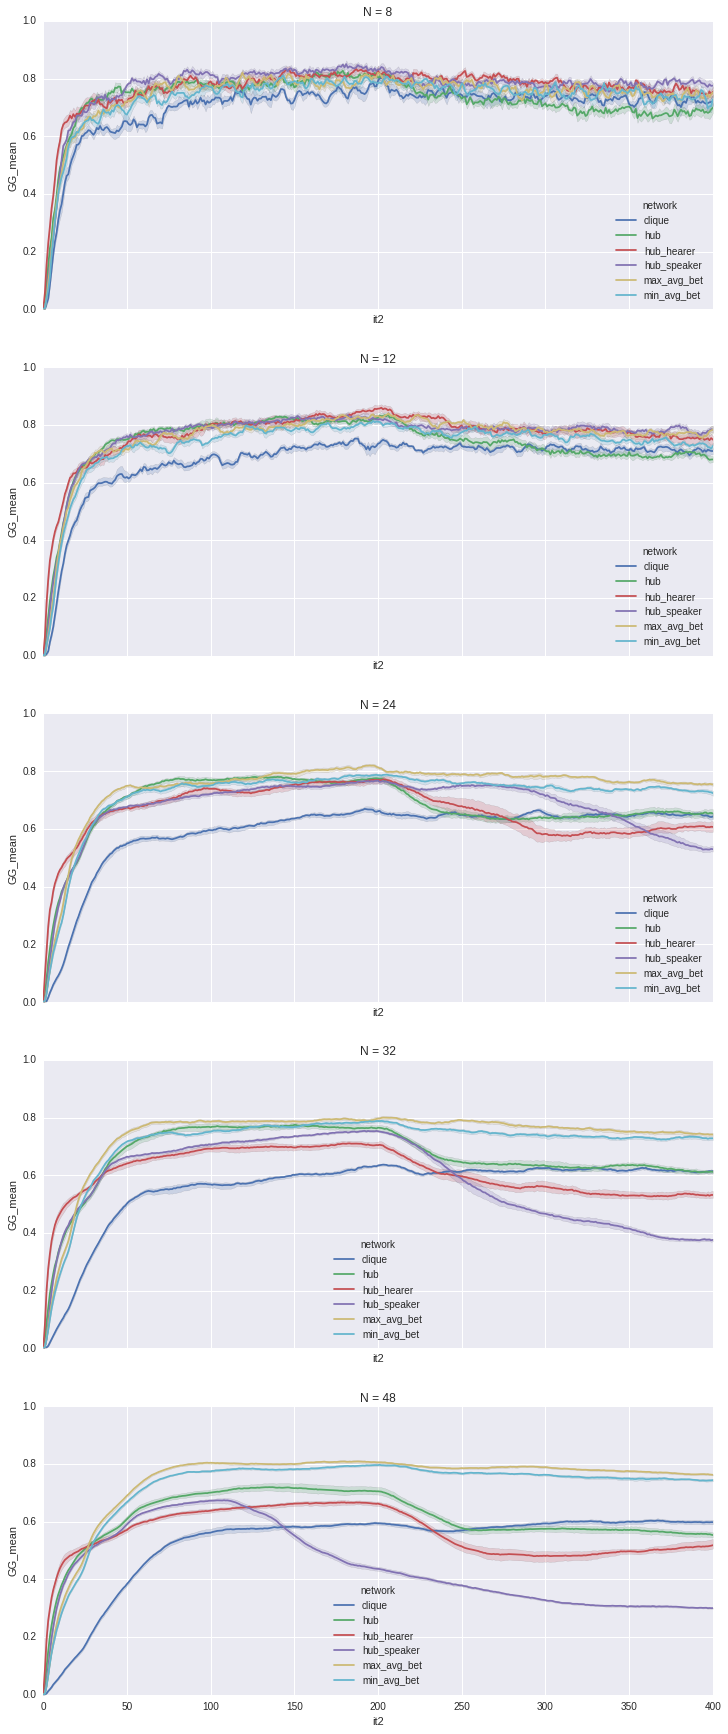

In [7]:
plot_sizes(env_shift, "GG")

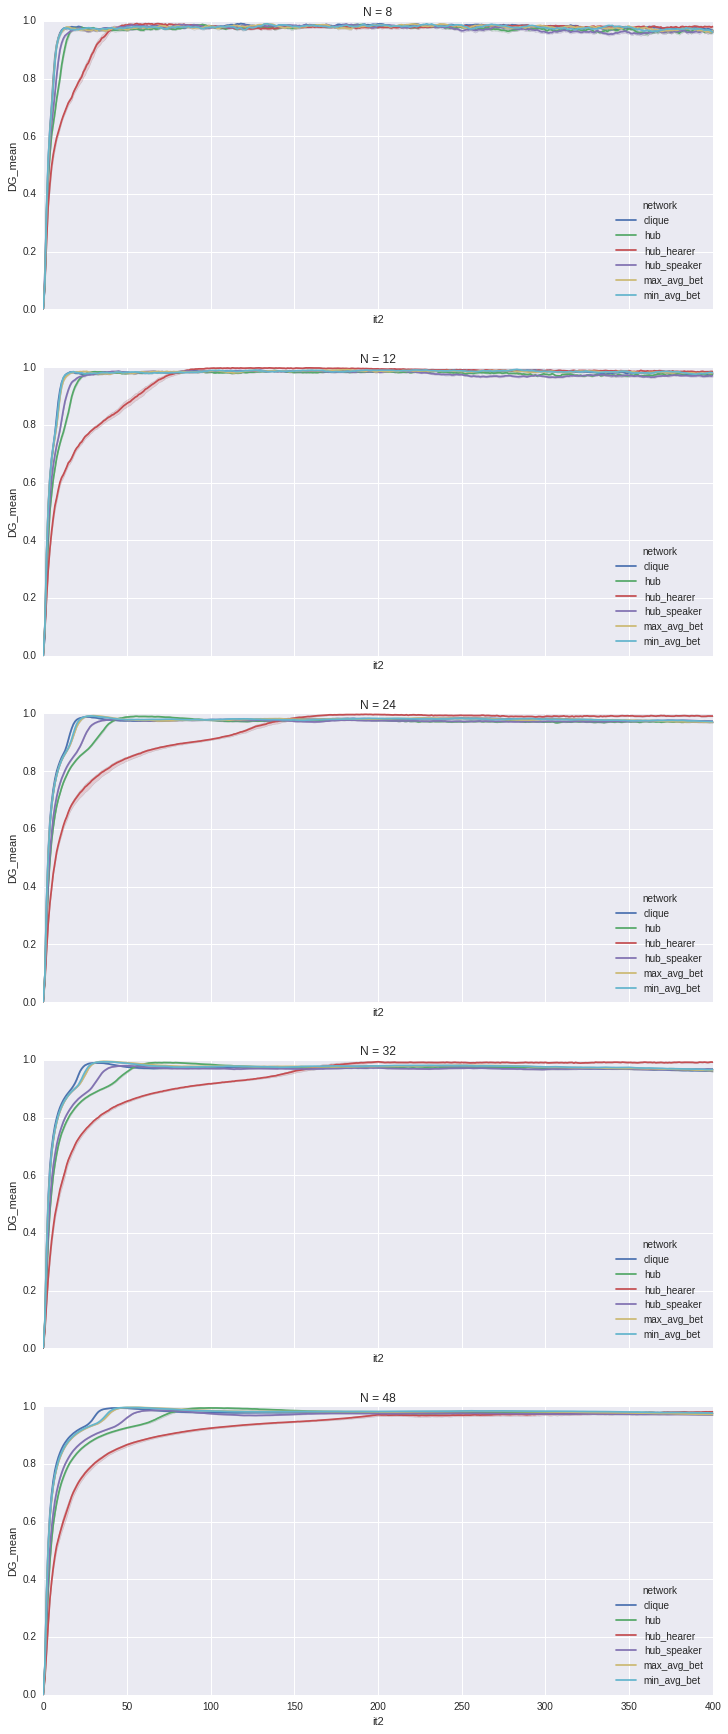

In [8]:
plot_sizes(env_shift, "DG")

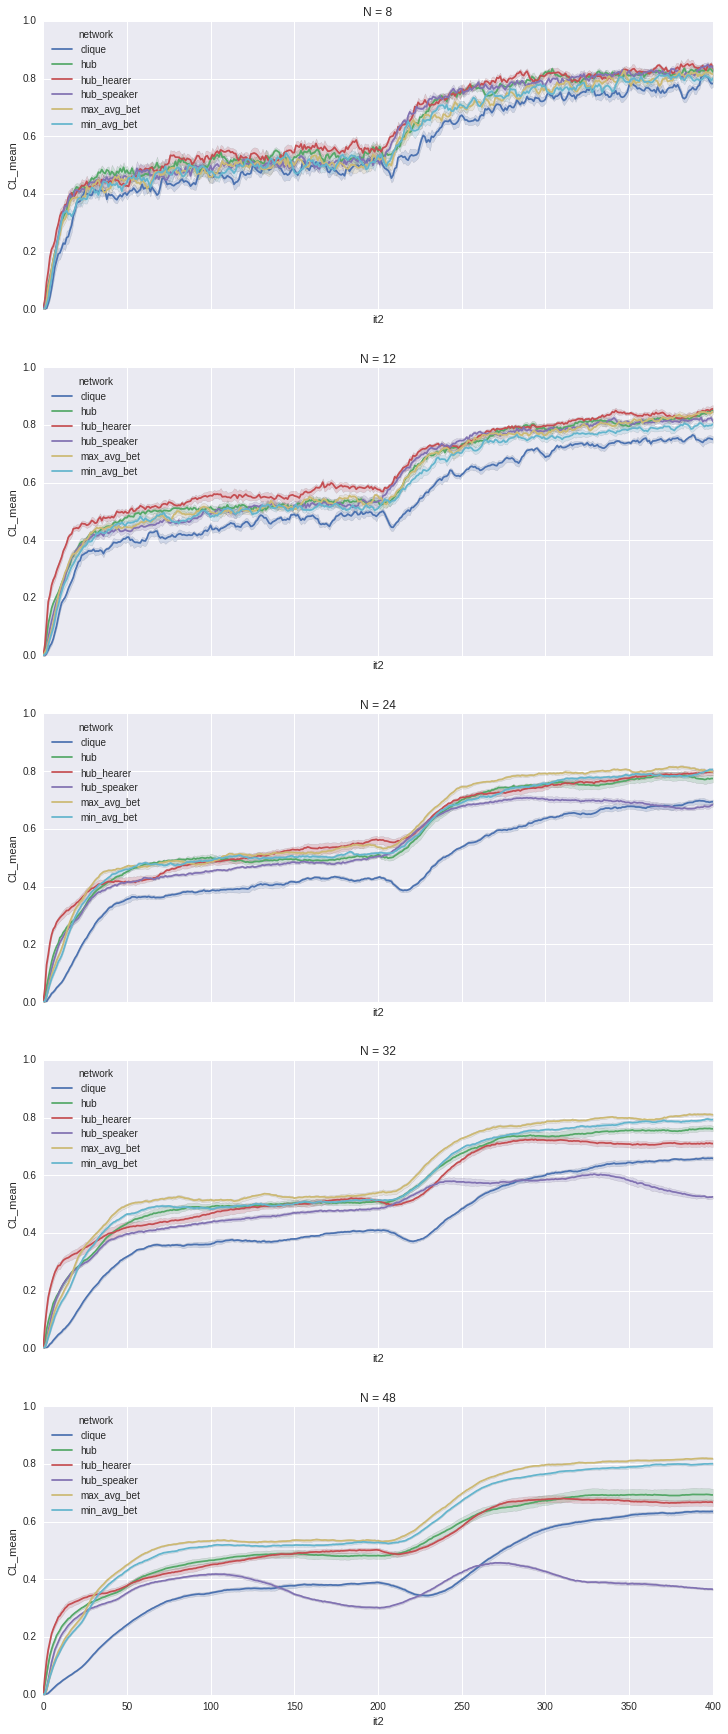

In [9]:
plot_sizes(env_shift, "CL")

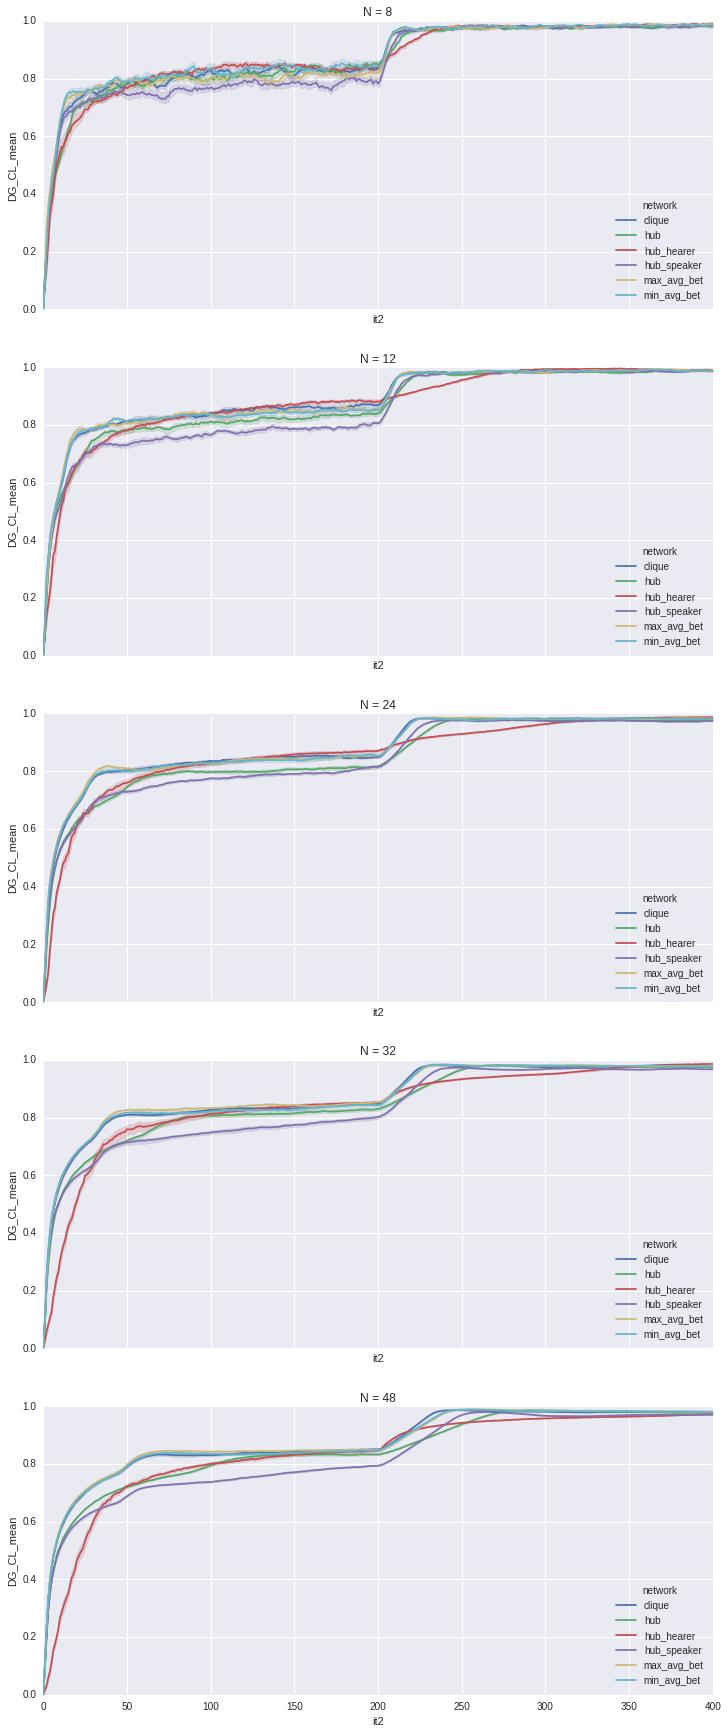

In [10]:
plot_sizes(env_shift, "DG_CL")

## Topology shift

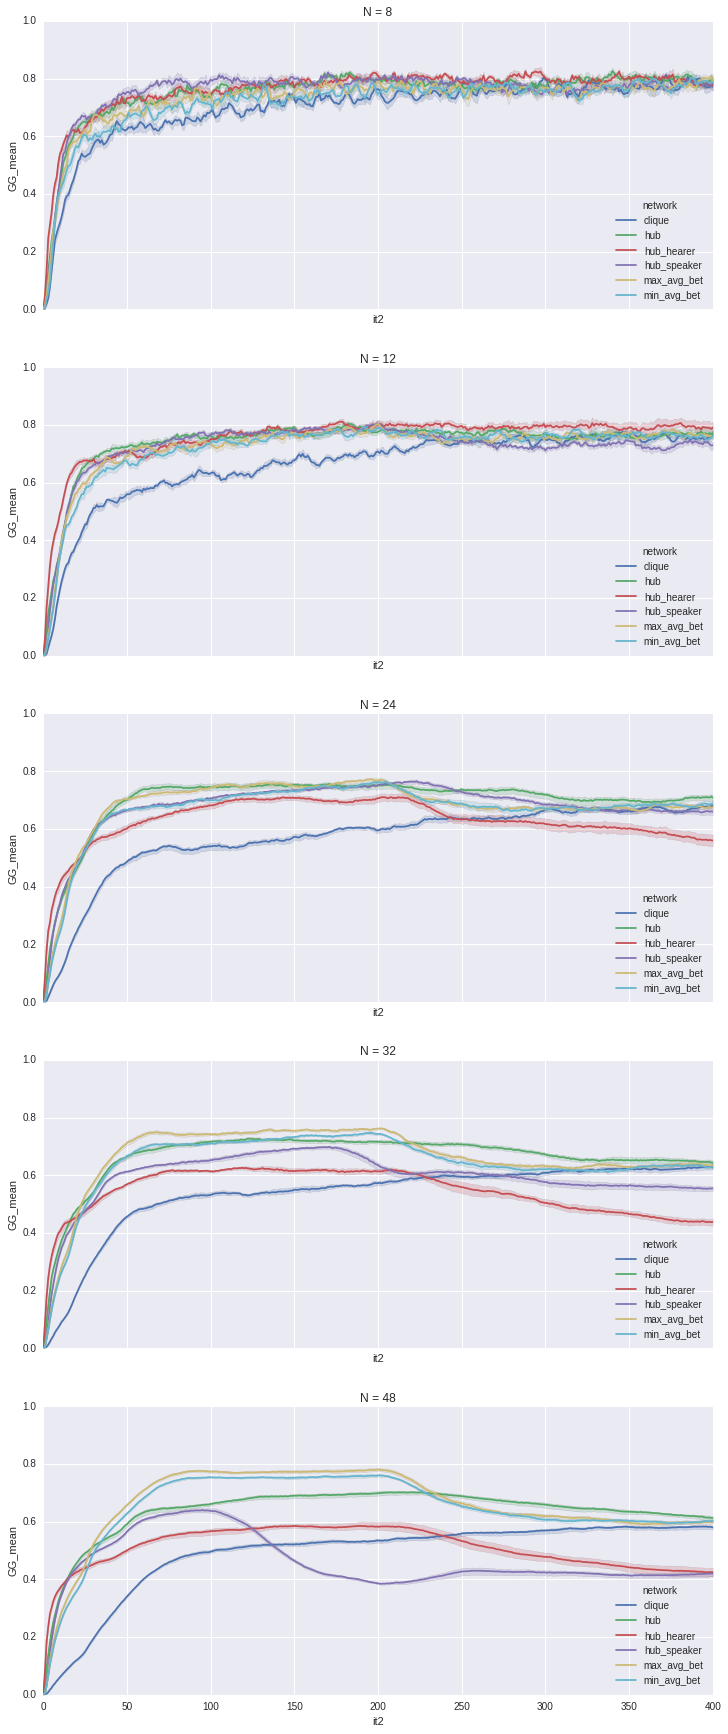

In [11]:
plot_sizes(top_shift, "GG")

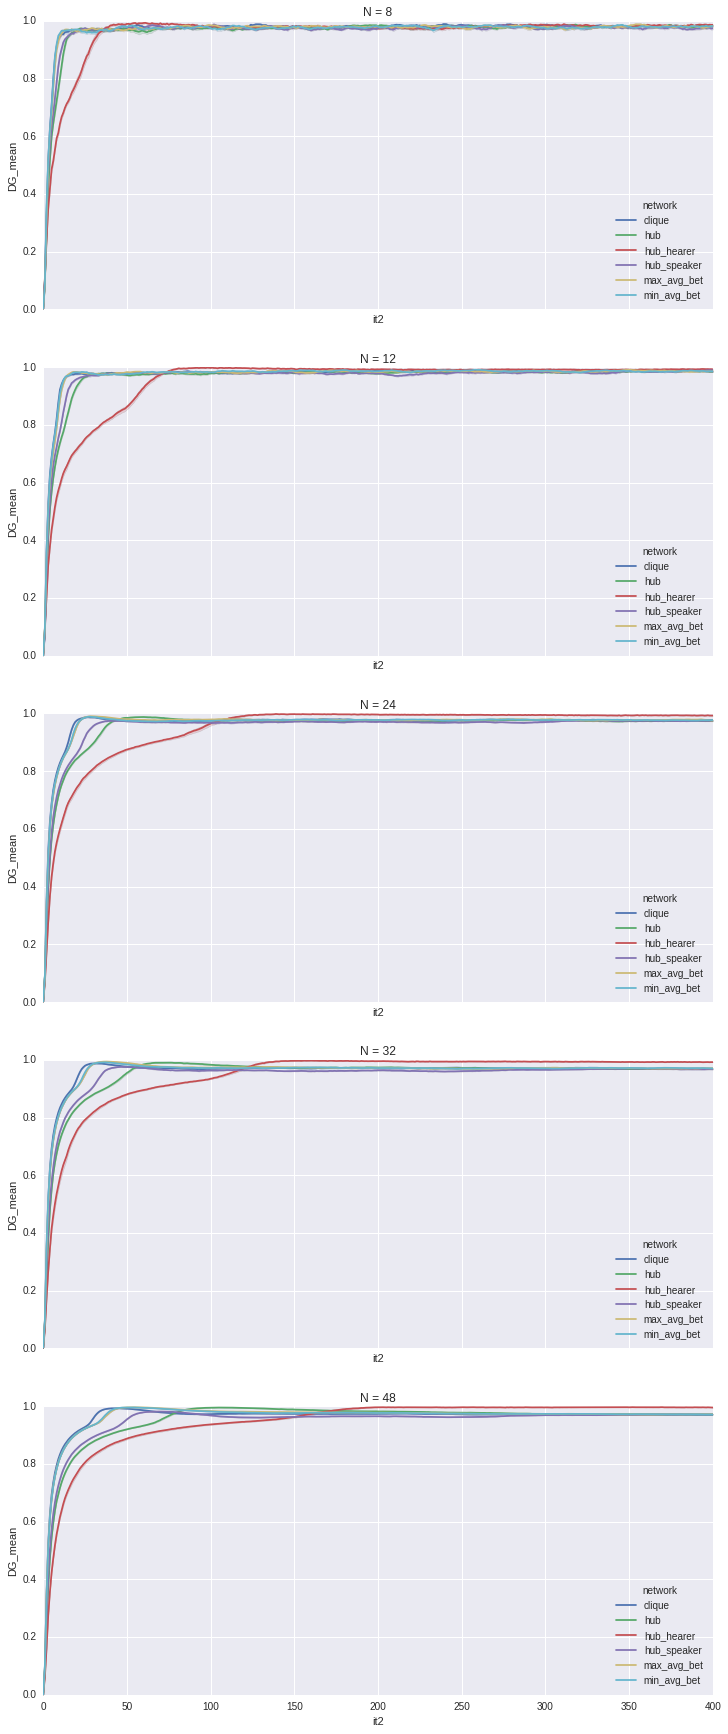

In [12]:
plot_sizes(top_shift, "DG")

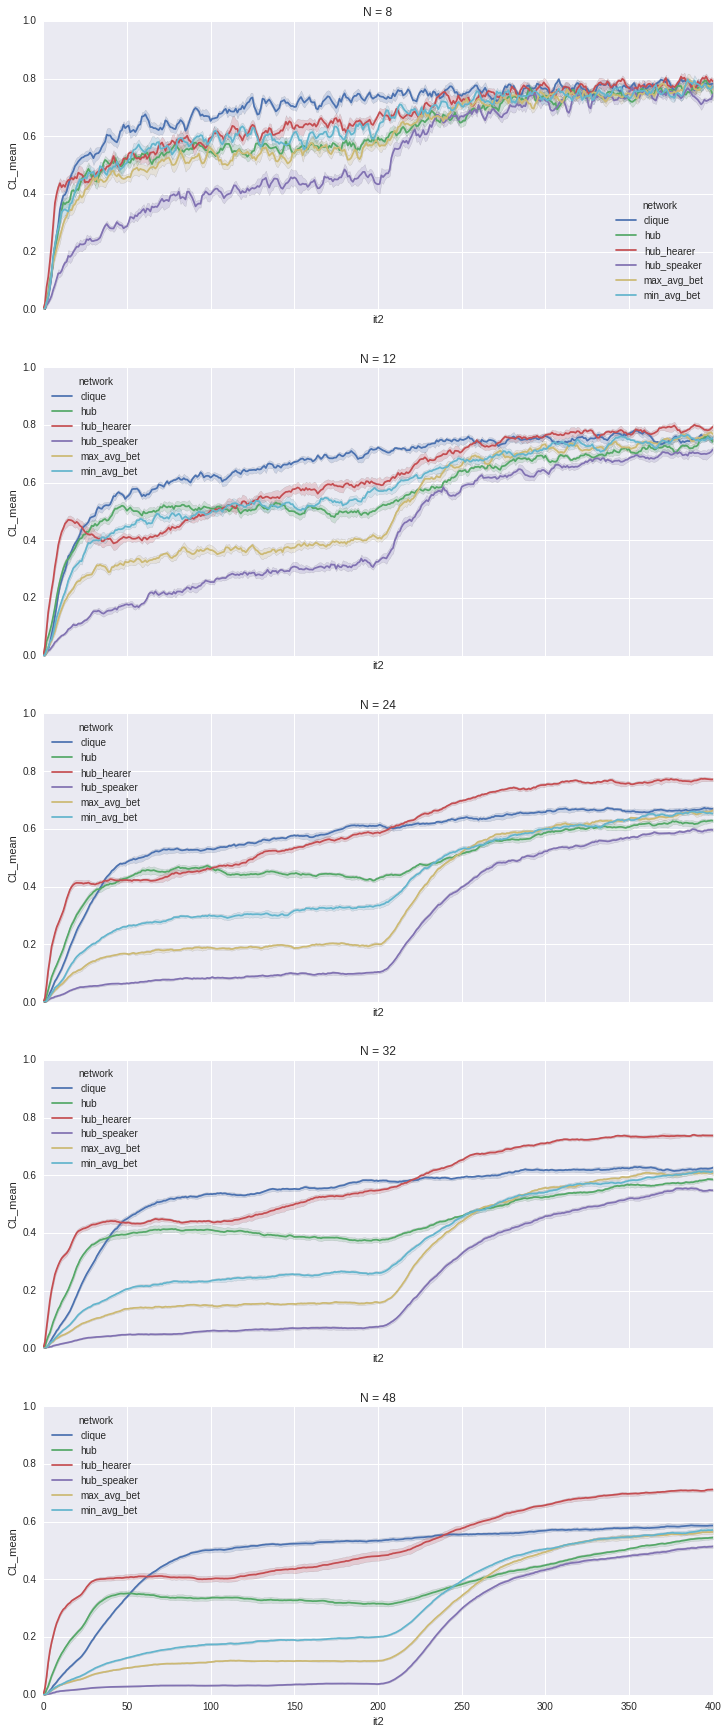

In [13]:
plot_sizes(top_shift, "CL")

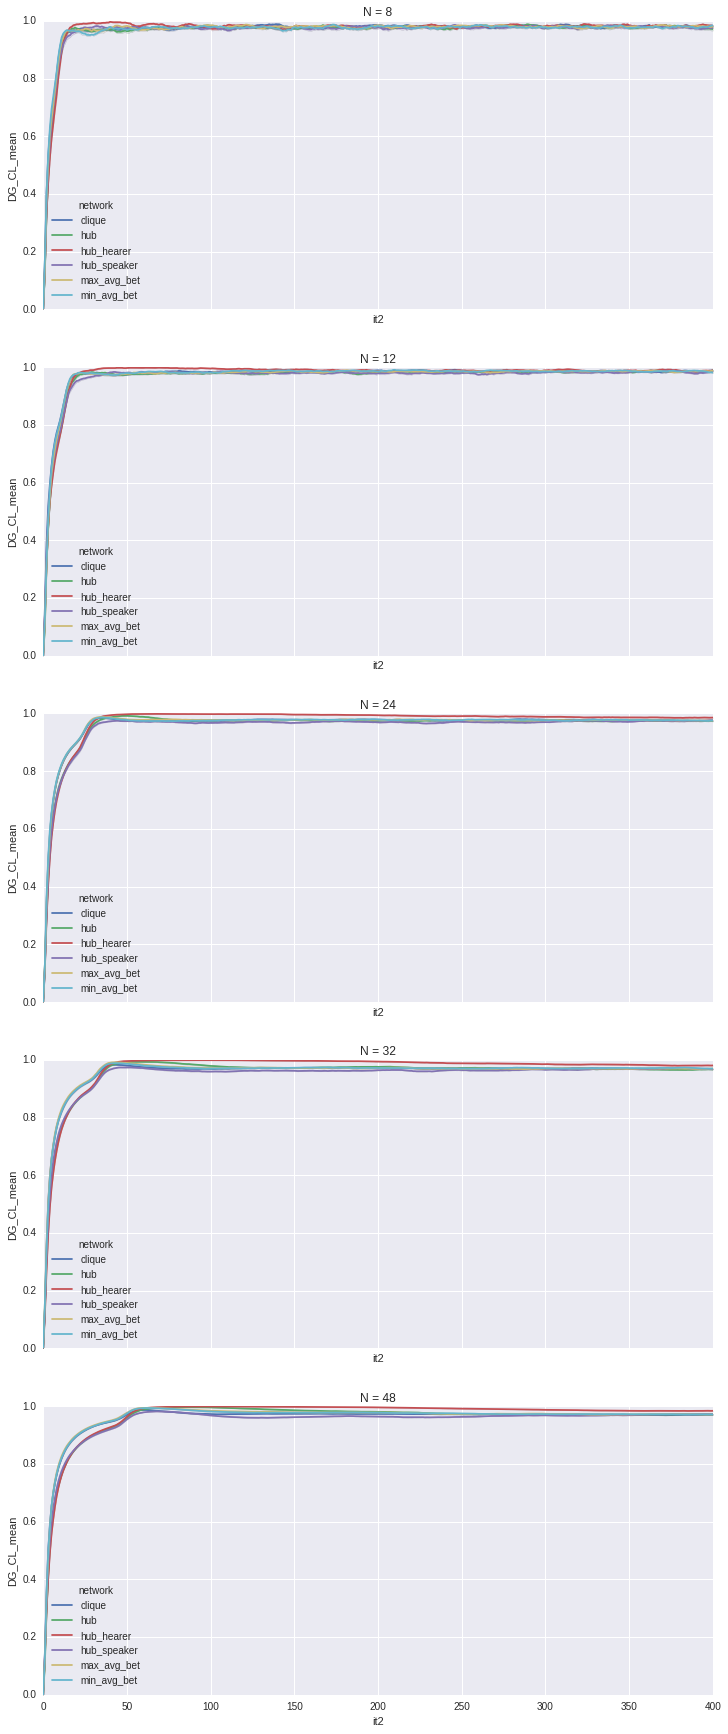

In [14]:
plot_sizes(top_shift, "DG_CL")